# Data Understanding, Description, and Summary

**If you are a Colab user**

If you use Colab Colab, you can uncomment the following cell to mount your Google Drive to Colab. <br>
After that, Clab can read/write files and data in your Google Drive <br>

please change the current directory to be the folder that you save your Notebook and <br>
data folder. For example, I save my Colab files and data in the following location

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Colab\ Notebooks

**Install Matplotlib**

matplotlib is a module for plotting, https://matplotlib.org/ <br>

runing the installation command in the terminal (if your computer is a Linux system) or <br>
other command-line interpreter application like Command Prompt or Anaconda Prompt <br>
(if your computer is a Windows system):

*conda install matplotlib*

If you would like to install it from this notebook, you uncomment the following cell and execute it

In [2]:
#!pip3 install matplotlib

So far, we have installed 
- jupyter notebook
- numpy
- pandas
- matplotlib

**Set up standards for the remainder of the notebook**

In [3]:
# import required libraries and modules, and define default setting for the notebook

import numpy as np # https://numpy.org/
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd # https://pandas.pydata.org/
from pandas import Series, DataFrame
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80

import matplotlib.pyplot as plt 
plt.rc("figure", figsize=(10, 6))

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Get to Know the Dataset

In this section, we would like to develop an initial understanding of the dataset "NY_Bicycle.csv", originally from NYC Open Data:
https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges-Historical-/gua4-p9wg/about_data

This dataset was used to measure the utilization of bicycles for the transportation planning purpose. This dataset is daily counts of bicycles crossing into or out of Manhattan via one of the East River bridges excluding Bronx thruways and the non-bikeable Hudson River tunnels for 7 months.

### DataFrame

In this review, we will intensively use a package called pandas comprising tools for data structure and data manipulation. Series, DataFrame, and Index are major objects in pandas.

Suggested excercises:

1. How to load csv file? Read the data file NY_Bicycle.csv as a DataFrame [Hint: use pd.read_csv)
2. The first glance of the data. Take a look at the first few rows of data [Hint: use .head( )]
3. Do you see any column that is not meaningful? [Hint: column 0]. If you feel that column is not useful, you may delete it. [Hint: use del]
4. What columns/variables/attributes are there in the dataset? What are their datatype? [Hint: use .info() or .columns()]
5. Do you want to check the name of a specific column? What is the name of column 4? [Hint: columns are an object. use columns[int] to check specific column name]
6. DataFrame can store heterogenious data. What types of data are stored in the DataFrame NY_Bicycle? [Hint: use .dtypes]
7. Do you want to check the data type of a specific colum? What is the datatype of the column "Weather"? 
8. What is the Index of this DataFrame? [Hint: use .index]
9. How to access the value(s) stored the DataFrame? Try the following: in column 3, in row 2, in row 2 of column 3, a segment that consists of rows 2&3 in columns 3-6.  [Hint: .values[row indices, column indices]]
10. Extract a column of the DataFrame as a series. [Hint: DataFrame.column]
11. Weather is a categorical variable. Are types of weather are there in the dataset? How many observations are there for each type? [Hint: Dataframe.unique(), Dataframe.weather.value_counts()]

In [4]:
# read the data file

NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data file in the csv format using function read_csv()
NY_bicycle.head() # display the first five rows using the head() method. If you wish to display a specific number of rows, enter that number in the bracket.
NY_bicycle.tail() # display the last five rows using the tail() method.

,Unnamed: 0,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


,Unnamed: 0,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
209,210,27-Oct,Friday,62.1,48.0,0.00,N,3150,5610,6450,5181,20391
210,211,28-Oct,Saturday,68.0,55.9,0.00,N,2245,4520,5104,4069,15938
211,212,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835
212,213,30-Oct,Monday,55.0,46.0,0.25,R,1428,2966,3547,2924,10865
213,214,31-Oct,Tuesday,54.0,44.0,0.00,N,2727,5597,5894,4883,19101


In [5]:
# delete the old index column from the csv file because the DataFrame object has its own index object

del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of DataFrame. Use del
NY_bicycle.head() # take a look at the data again after deleting the unnamed column

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


In [6]:
# the info() method summarizes columns and their data types

NY_bicycle.info() 

# The data type of columns indexed as 0, 1, and 5 are object. Object is a way of storing text data besides StringDtype
# Column 4 has less data points (200) than the number of entries, indicating it has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 214 non-null    object 
 1   Day                  214 non-null    object 
 2   High_Temp_F          214 non-null    float64
 3   Low_Temp_F           214 non-null    float64
 4   Precipitation        200 non-null    float64
 5   Weather              214 non-null    object 
 6   Brooklyn_Bridge      214 non-null    int64  
 7   Manhattan_Bridge     214 non-null    int64  
 8   Williamsburg_Bridge  214 non-null    int64  
 9   Queensboro_Bridge    214 non-null    int64  
 10  Total                214 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.5+ KB


In [7]:
# the attribute columns shows column lables as an Index object

NY_bicycle.columns 

Index(['Date', 'Day', 'High_Temp_F', 'Low_Temp_F', 'Precipitation', 'Weather',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

In [8]:
# Check the column label by colum index. Keep in mind that the first column index value is zero, not one

NY_bicycle.columns[4] 

'Precipitation'

In [9]:
# check the datatypes of the entire DataFrame or a column using the dtypes attribure

NY_bicycle.dtypes

print('\nThe data type of Weather is:')
NY_bicycle['Weather'].dtypes

Date                    object
Day                     object
High_Temp_F            float64
Low_Temp_F             float64
Precipitation          float64
Weather                 object
Brooklyn_Bridge          int64
Manhattan_Bridge         int64
Williamsburg_Bridge      int64
Queensboro_Bridge        int64
Total                    int64
dtype: object


The data type of Weather is:


dtype('O')

In [10]:
# to find how the data are indexed, use the index attribute. 

NY_bicycle.index # the returned Index object shows that it starts from zero, and ends by 214 (excluded), and the step size is 1

RangeIndex(start=0, stop=214, step=1)

In [11]:
# to check an entry/row of the DataFrame, using dataframe.values[index of the row]

print('Values in column 3:')
NY_bicycle.values[:,3] # values in column 3

print('\n Values in  row 2:')
NY_bicycle.values[2] # values in row 2

Values in column 3:


array([37.0, 41.0, 50.0, 46.0, 46.0, 41.0, 43.0, 39.9, 45.0, 55.0, 62.1,
       57.9, 48.9, 48.9, 52.0, 62.1, 64.0, 50.0, 45.0, 50.0, 48.0, 52.0,
       46.9, 50.0, 50.0, 54.0, 59.0, 57.9, 64.0, 54.0, 50.0, 66.9, 57.9,
       50.0, 52.0, 57.0, 48.9, 45.0, 48.0, 51.1, 51.8, 51.1, 45.0, 46.0,
       55.9, 57.9, 66.0, 75.0, 75.9, 55.9, 55.0, 54.0, 57.9, 57.0, 55.9,
       55.9, 61.0, 59.0, 55.9, 55.9, 57.9, 62.1, 60.1, 55.0, 60.1, 60.1,
       53.1, 54.0, 59.0, 59.0, 68.0, 73.0, 77.0, 78.1, 69.1, 66.0, 66.0,
       66.9, 72.0, 70.0, 72.0, 72.0, 70.0, 75.9, 71.1, 69.1, 66.0, 61.0,
       62.1, 68.0, 73.9, 72.0, 73.0, 71.1, 70.0, 71.1, 71.1, 68.0, 70.0,
       69.1, 71.1, 75.0, 77.0, 77.0, 64.9, 68.0, 70.0, 73.9, 75.9, 77.0,
       78.1, 77.0, 78.1, 73.0, 63.0, 64.0, 66.0, 66.9, 73.0, 68.0, 64.9,
       66.9, 72.0, 69.1, 70.0, 70.0, 70.0, 64.0, 64.9, 66.0, 66.0, 69.1,
       70.0, 64.9, 71.1, 70.0, 69.1, 70.0, 71.1, 73.0, 73.0, 70.0, 73.0,
       75.0, 71.1, 66.0, 64.0, 62.1, 63.0, 63.0, 62


 Values in  row 2:


array(['3-Apr', 'Monday', 63.0, 50.0, 0.03, 'R', 2470, 4988, 5178, 3689,
       16325], dtype=object)

In [12]:
# to check the value of a column in a row, using .values[index of the row][index of column]

NY_bicycle.values[2][3] 

50.0

In [13]:
# to check the value of a slice of data, using .values[range of row indices, range of column indices]

NY_bicycle.values[2:4,3:7]

array([[50.0, 0.03, 'R', 2470],
       [46.0, 1.18, 'R', 723]], dtype=object)

In [14]:
# display the data of a column using .column label

NY_bicycle.Weather 

0      N
1      N
2      R
3      R
4      N
      ..
209    N
210    N
211    R
212    R
213    N
Name: Weather, Length: 214, dtype: object

In [15]:
# what are unique values for Weather?
NY_bicycle.Weather.unique()

# How many observations for each type?
NY_bicycle.Weather.value_counts()

array(['N', 'R', 'T'], dtype=object)

Weather
N    131
R     69
T     14
Name: count, dtype: int64

### Data Modification

Sorting and filtering are commonly used methods to modify data so that we can understand data conveniently

#### Sorting

Sorting is about ordering entries in the DataFrame

We can sort rows according to values of one or multiple columns using the sort_values() function. We can also sort rows according to their index using the sort_index() method.

Suggested exercises
1. Sort the DataFrame by column "Total" in a descending order (i.e., from largest value to smallest value). If there are any missing values, put them at the begining [Hint: use .sort_values]
2. Sort the DataFrame by column "Weather" in reverse alphabetical order
3. Sort the DataFrame by its index allows returning back to the origional sequence of entries. [Hint: use .sort_index()]
4. Sort the DataFrame by values of multiple columns in a specific sequence. For example, sort the DataFrame in the following sequence: "High_Temp_F", "Low_Temp_F", "Total". 
5. Display only columns "High_Temp_F", "Low_Temp_F", and "Total" of the sorted DataFrame in step 4.

In [16]:
# The sort_values() method sorts DataFrame by values of a column

NY_bicycle.sort_values(by='Total', # sort by the values of 'Total'
                       na_position='first', # entries with missing values at the beginning
                       ascending=False)  # in a descending order

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
116,26-Jul,Wednesday,75.9,66.0,0.00,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.00,N,3893,7791,8589,6582,26855
88,28-Jun,Wednesday,78.1,62.1,0.00,N,3766,8239,8873,5834,26712
164,12-Sep,Tuesday,78.1,61.0,0.00,N,3497,7983,8756,6386,26622
75,15-Jun,Thursday,75.0,66.0,0.00,N,3510,7854,8652,6344,26360
...,...,...,...,...,...,...,...,...,...,...,...
34,5-May,Friday,59.0,52.0,3.02,R,513,1471,1951,1421,5356
5,6-Apr,Thursday,48.9,41.0,0.73,R,461,1324,1739,1372,4896
54,25-May,Thursday,57.9,55.9,0.58,R,488,1196,1789,1316,4789
211,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835


In [17]:
# ascending=False returns the sorting result in the reverse alphabetical order

NY_bicycle.sort_values(by='Weather', 
                       ascending=False # reverse alphabetical order
                      ) 

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
117,27-Jul,Thursday,77.0,66.9,NaN,T,3287,6624,7221,5997,23129
132,11-Aug,Friday,81.0,70.0,NaN,T,3148,6295,7068,5669,22180
73,13-Jun,Tuesday,93.9,78.1,NaN,T,2882,6141,7155,5399,21577
78,18-Jun,Sunday,84.0,72.0,NaN,T,2199,4014,4901,3396,14510
23,24-Apr,Monday,60.1,50.0,NaN,T,2544,5366,5762,4183,17855
...,...,...,...,...,...,...,...,...,...,...,...
99,9-Jul,Sunday,81.0,69.1,0.0,N,3048,5446,5782,4044,18320
100,10-Jul,Monday,82.9,71.1,0.0,N,3506,7503,8106,5712,24827
101,11-Jul,Tuesday,84.0,75.0,0.0,N,2929,6436,7249,5129,21743
102,12-Jul,Wednesday,87.1,77.0,0.0,N,2860,6283,7102,4929,21174


In [18]:
# Entries in DataFrame are indexed. sort by index allows for returning to the origional sequence of entries in the DataFrame

out1 = NY_bicycle.sort_values(by='Total', 
                              na_position='first',
                              ascending=True) 
out1

out1.sort_index() # after sorted by index using sort_index(), entries in the DataFrame return to its origional sequence

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
42,13-May,Saturday,51.1,45.0,1.31,R,151,484,874,865,2374
211,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835
54,25-May,Thursday,57.9,55.9,0.58,R,488,1196,1789,1316,4789
5,6-Apr,Thursday,48.9,41.0,0.73,R,461,1324,1739,1372,4896
34,5-May,Friday,59.0,52.0,3.02,R,513,1471,1951,1421,5356
...,...,...,...,...,...,...,...,...,...,...,...
75,15-Jun,Thursday,75.0,66.0,0.00,N,3510,7854,8652,6344,26360
164,12-Sep,Tuesday,78.1,61.0,0.00,N,3497,7983,8756,6386,26622
88,28-Jun,Wednesday,78.1,62.1,0.00,N,3766,8239,8873,5834,26712
130,9-Aug,Wednesday,82.9,66.0,0.00,N,3893,7791,8589,6582,26855


,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991
...,...,...,...,...,...,...,...,...,...,...,...
209,27-Oct,Friday,62.1,48.0,0.00,N,3150,5610,6450,5181,20391
210,28-Oct,Saturday,68.0,55.9,0.00,N,2245,4520,5104,4069,15938
211,29-Oct,Sunday,64.9,61.0,3.03,R,183,661,1026,965,2835
212,30-Oct,Monday,55.0,46.0,0.25,R,1428,2966,3547,2924,10865


In [19]:
# sort the DataFrame by multiple columns is a common requirement in data analysis
# In this example, we sort the DataFrame by "High_Temp_F" first, then "Low_Temp_F", and last "Total"
# Take a look at the third (index==72) and the fourth entires (index==47) in the sorted DataFrame, what catch your attention?
out2 = NY_bicycle.sort_values(
    by=['High_Temp_F', 'Low_Temp_F', 'Total'],
    ascending=False
)

# display selected columns of the sorted dataframe, whose indices are 2, 3, and 10
out2.loc[:,['High_Temp_F', 'Low_Temp_F', 'Total']] 

,High_Temp_F,Low_Temp_F,Total
73,93.9,78.1,21577
110,93.0,78.1,20405
72,91.9,77.0,21200
47,91.9,75.0,23474
112,91.0,78.1,14422
...,...,...,...
3,51.1,46.0,6581
42,51.1,45.0,2374
5,48.9,41.0,4896
6,48.0,43.0,10341


#### Filtering

Filtering is a method to select an interested row(s), column(s), or a segment/slice of the data frame.

Commonly used methods include .iloc, loc, and Boolean index.

Suggested Exercises:

1. How to use .iloc[], an integer-based index method, to extract one datapoint or a slice of the DataFrame? Try the following: access column 3, row 2, row 2 in column 3, a slice that consists of rows 2&3 in columns 3-6, and a segment with selected rows and columns
2. How to use .loc[], a label-based method, to access one datapoint or a slice of the DataFrame? Try the following: access column "Low_Temp_F", row 2, row 2 in column "Low_Temp_F", a segment that consists of rows 2&3 in columns "Low_Temp_F", Precipitation, Weather, and Brooklyn_Bridge.
3. Extract a slice using iloc. For example, extracting rows 3~5 in columns 6-9 [Hint: .iloc]
4. Select rows meeting the crition "Total" value >26,000 [Hint: Boolean index)
5. Sort the DataFrame by "Total" in the descending order, review the sorting result, and then extract the segment that meets the criteron "Total">26,000
6. extract columns 'Precipitation','High_Temp_F', and 'Low_Temp_F' with "Total" value >26,000 [Hint: use .loc[] and a combination of Boolean index and column labels)
7. extract the column 'Precipitation' with 'Weather' value equal to T
8. extract columns 'Low_Temp_F' and 'High_Temp_F' with 'Brooklyn_Bridge' >=3,000 and 'Day'= Wednesday. Sort values by both 'Low_Temp_F' and 'High_Temp_F' in that order.

In [20]:
# using iloc[:,column index] to display a column of data by indices.
# iloc is integer-based index method

NY_bicycle.iloc[:,3] 

0      37.0
1      41.0
2      50.0
3      46.0
4      46.0
       ... 
209    48.0
210    55.9
211    61.0
212    46.0
213    44.0
Name: Low_Temp_F, Length: 214, dtype: float64

In [21]:
# iloc[row index,:] to display an row by the row index
# iloc is integer-based

NY_bicycle.iloc[2,:] 

Date                    3-Apr
Day                    Monday
High_Temp_F              63.0
Low_Temp_F               50.0
Precipitation            0.03
Weather                     R
Brooklyn_Bridge          2470
Manhattan_Bridge         4988
Williamsburg_Bridge      5178
Queensboro_Bridge        3689
Total                   16325
Name: 2, dtype: object

In [22]:
# DataFrame.iloc[row index,column index] retrieves the value at the coordinates

NY_bicycle.iloc[2,3] 

np.float64(50.0)

In [23]:
# DataFrame.iloc for accessing a slice of data

NY_bicycle.iloc[2:4,3:7]

,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge
2,50.0,0.03,R,2470
3,46.0,1.18,R,723


In [24]:
# extract a segment of data based on row and column indices
NY_bicycle.iloc[2:4,[5,3]]

,Weather,Low_Temp_F
2,R,50.0
3,R,46.0


In [25]:
# .loc is label based.

# access row 2. Here 2 is treated as a label
NY_bicycle.loc[2,:]

Date                    3-Apr
Day                    Monday
High_Temp_F              63.0
Low_Temp_F               50.0
Precipitation            0.03
Weather                     R
Brooklyn_Bridge          2470
Manhattan_Bridge         4988
Williamsburg_Bridge      5178
Queensboro_Bridge        3689
Total                   16325
Name: 2, dtype: object

In [26]:
# to access a column, we need to show the column label
NY_bicycle.loc[:,"Low_Temp_F"]

0      37.0
1      41.0
2      50.0
3      46.0
4      46.0
       ... 
209    48.0
210    55.9
211    61.0
212    46.0
213    44.0
Name: Low_Temp_F, Length: 214, dtype: float64

In [27]:
# to access the element in one specific row of a column
NY_bicycle.loc[2,"Low_Temp_F"]

np.float64(50.0)

In [28]:
# to access a slice of the data
NY_bicycle.loc[2:4,["Low_Temp_F","Precipitation", "Weather", "Brooklyn_Bridge"]]

,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge
2,50.0,0.03,R,2470
3,46.0,1.18,R,723
4,46.0,0.00,N,2807


In [29]:
# to extract a segment of data
NY_bicycle.loc[[5,2],["Weather", "Precipitation", "High_Temp_F", "Manhattan_Bridge"]]

,Weather,Precipitation,High_Temp_F,Manhattan_Bridge
5,R,0.73,48.9,1324
2,R,0.03,63.0,4988


In [30]:
# extract entries with the crition: 'Total' value >26,000
# A Boolean index indicates if the condition is met in each row
    
NY_bicycle[NY_bicycle.Total>26_000]
# In this example, only 8 rows meet this conditions: rows 45, 46, 75, 88, 116, 130, 164, and 192

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
45,16-May,Tuesday,78.1,57.9,0.0,N,3666,7847,8420,6209,26142
46,17-May,Wednesday,90.0,66.0,0.0,N,3535,7888,8540,6121,26084
75,15-Jun,Thursday,75.0,66.0,0.0,N,3510,7854,8652,6344,26360
88,28-Jun,Wednesday,78.1,62.1,0.0,N,3766,8239,8873,5834,26712
116,26-Jul,Wednesday,75.9,66.0,0.0,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.0,N,3893,7791,8589,6582,26855
164,12-Sep,Tuesday,78.1,61.0,0.0,N,3497,7983,8756,6386,26622
192,10-Oct,Tuesday,80.1,66.0,0.0,N,3922,7499,8208,6421,26050


In [31]:
# Extract the segment of DataFrame with "Total">26,000, which is sorted by "Total" in the descending order


out3 = NY_bicycle.sort_values(by='Total', 
                              na_position='first',
                              ascending=False
                             ) #sort the dataframe by "Total" in the descending order

out3[out3.Total>26_000] #extract entriess with the crition: 'Total' value >26,000

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
116,26-Jul,Wednesday,75.9,66.0,0.0,N,3821,7987,8605,6556,26969
130,9-Aug,Wednesday,82.9,66.0,0.0,N,3893,7791,8589,6582,26855
88,28-Jun,Wednesday,78.1,62.1,0.0,N,3766,8239,8873,5834,26712
164,12-Sep,Tuesday,78.1,61.0,0.0,N,3497,7983,8756,6386,26622
75,15-Jun,Thursday,75.0,66.0,0.0,N,3510,7854,8652,6344,26360
45,16-May,Tuesday,78.1,57.9,0.0,N,3666,7847,8420,6209,26142
46,17-May,Wednesday,90.0,66.0,0.0,N,3535,7888,8540,6121,26084
192,10-Oct,Tuesday,80.1,66.0,0.0,N,3922,7499,8208,6421,26050


In [32]:
# # use dataframe.loc[] to Access a group of rows and columns by label(s) or a boolean array. 
# This example extracts columns 'Precipitation','High_Temp_F', 'Low_Temp_F', whose 'Total' values are greater than 26,000

NY_bicycle.loc[NY_bicycle.Total>26_000, 
                ['Precipitation','High_Temp_F', 'Low_Temp_F']
                ] 

,Precipitation,High_Temp_F,Low_Temp_F
45,0.0,78.1,57.9
46,0.0,90.0,66.0
75,0.0,75.0,66.0
88,0.0,78.1,62.1
116,0.0,75.9,66.0
130,0.0,82.9,66.0
164,0.0,78.1,61.0
192,0.0,80.1,66.0


In [33]:
# Question: what is the precipitation when weather is 'T' (Trace)?

# extract column 'Precipitation' with 'Weather' value equal to T

NY_bicycle.loc[NY_bicycle.Weather=='T',
                ['Precipitation']
                ] 
# We find that when Weather == "T" (Trace), the Precipitation is NaN.

,Precipitation
6,NaN
15,NaN
16,NaN
18,NaN
23,NaN
73,NaN
78,NaN
90,NaN
96,NaN
117,NaN


In [34]:
# What are the daily lowest and highest temperatures when the daily bicycle count is at least 3,000 on Wednesday?
# Then, sort the extracted slice by values of "Low_Temp_F" and then "High_Temp_F" in a descending order

NY_bicycle.loc[(NY_bicycle.Brooklyn_Bridge>=3000) & (NY_bicycle.Day=='Wednesday'),
                ['Low_Temp_F', 'High_Temp_F']
                ].sort_values(['Low_Temp_F','High_Temp_F'],
                              ascending=False
                             ) 

,Low_Temp_F,High_Temp_F
109,77.0,91.0
81,72.0,82.0
95,71.1,84.9
179,71.1,84.9
172,71.1,78.1
137,70.0,84.9
46,66.0,90.0
130,66.0,82.9
116,66.0,75.9
88,62.1,78.1


## Data Distribution

Almost every column in the DataFrame has distributed values. Data distribution refers to the way data are distributed across different values. 

First, we can use the describe() method to generate column-wise descriptive statistics

In [35]:
NY_bicycle.describe(include='all').round(1) # include='all' allows for display descriptive statistics for all variables

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
count,214,214,214.0,214.0,200.0,214,214.0,214.0,214.0,214.0,214.0
unique,214,7,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,1-Apr,Saturday,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
freq,1,31,NaN,NaN,NaN,131,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,74.2,62.0,0.1,NaN,2680.0,5345.5,6051.7,4550.5,18627.7
std,NaN,NaN,10.4,9.3,0.4,NaN,854.7,1746.5,1755.8,1306.9,5539.6
min,NaN,NaN,46.0,37.0,0.0,NaN,151.0,484.0,874.0,865.0,2374.0
25%,NaN,NaN,66.9,55.2,0.0,NaN,2298.0,4308.0,5115.0,3746.0,15704.8
50%,NaN,NaN,75.9,64.0,0.0,NaN,2857.0,5607.5,6287.0,4681.0,19367.0
75%,NaN,NaN,82.0,70.0,0.1,NaN,3285.0,6759.5,7512.5,5692.0,23151.5


### Categorical Data

For categorical data, we often generate frequency distributions.

value_counts() is a method commonly used for finding the frequency distribution of categorical data

- **Frequency distribution**: A summary of data that shows the count of entries in each of several non-overlapping classes. Typically referred to as bins, when dealing with distributions.
- **Relative frequency distribution**: A tabular summary of data showing the relative frequency for each bin.

Suggested Exercises:

1. Count entries of each weather type to show the frequency distribution [Hint: .value_counts]. 
2. Then, show the relative frequency distribution. [Hint: value_counts has an argument named normalize]
3. [Optional] Show frequency distributions of "Weather" as histograms

In [36]:
# use Series.value_counts(normalize=) returns the counts when normalize=False

NY_bicycle.Weather.value_counts(normalize=False) 
# There are 131 entries of N (no rain), 69 of R (rain), and 14 of T (trace)

Weather
N    131
R     69
T     14
Name: count, dtype: int64

In [37]:
# # use Series.value_counts(normalize=) returns the percentages when normalize=True

NY_bicycle.Weather.value_counts(normalize=True).map('{:.3f}'.format) 
# after normalization, we obtain the relative frequency distribution. 
# It shows that 61.2% of the days is N (no rain), 32.2% is R (rain), and 0.5% is T (trace)

Weather
N    0.612
R    0.322
T    0.065
Name: proportion, dtype: object

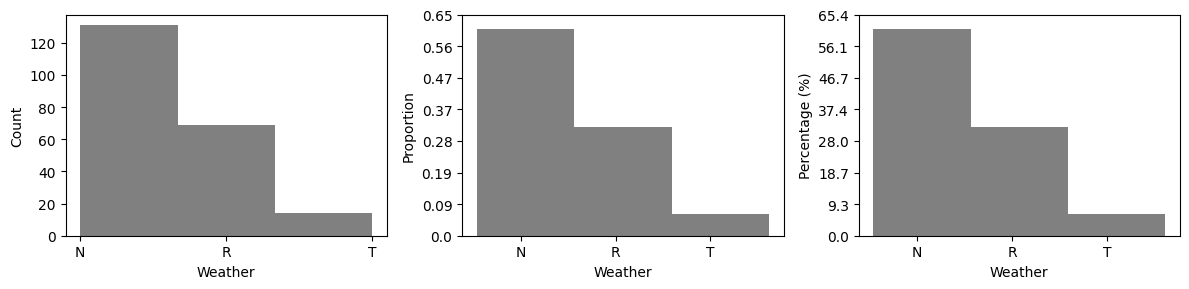

In [38]:
# Create histogram for a categorical column using hist()

fig, axs = plt.subplots(1,3, 
                        sharey=False, 
                        sharex=False, 
                        tight_layout=True, 
                        figsize=(12,3)) # define a figure with three subplots that are arranged as one row. yshare defines if the three plots share the y axis. xshare is similarly defined.

# frequency distribution
axs[0].hist(NY_bicycle.Weather, bins=3,color='grey')
axs[1].set_xticks(np.arange(0.3,2,0.65))
axs[0].set_xlabel('Weather')
axs[0].set_ylabel('Count')

# relative frequency distribution
axs[1].hist(NY_bicycle.Weather,bins=3, color='grey')
axs[1].set_xlabel('Weather')
axs[1].set_ylabel('Proportion')
axs[1].set_xticks(np.arange(0.3,2,0.65))
axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_yticklabels((axs[1].get_yticks()/len(NY_bicycle)).round(2)) # ytick labels are in relative frequency and rounded to two decimal places

# percent frequency distribution
axs[2].hist(NY_bicycle.Weather,bins=3, color='grey')
axs[2].set_xlabel('Weather')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_xticks(np.arange(0.3,2,0.65))
axs[2].set_yticks(axs[2].get_yticks())
axs[2].set_yticklabels((axs[2].get_yticks()/len(NY_bicycle)*100).round(1)) # ytick labels are in percent frequency and rounded to one decimal places

plt.show();

### Numerical Data

For numerical data, we often divide the range of data into equally spaced bins that are muturally exclusive and collective inclusive. Then, we count the number of entries falling in each bin. 

Suggested exercises:
1. Have a basic understanding of the sample distribution of "Total". We can count the number of entries in the Series "Total", and find the minimum and maximum values of "Total", respectively.
2. Divide the data range of "Total" into 9 bins, and count the entries within each bin. [Hint: use the cut function and the value_counts method]
3. [Optional] Plot the histogram of "Total" to show the distribution

In [39]:
# The count() method returns the number of non-NA entries
NY_bicycle.Total.count() 

# max() returns the maximum value of a numerical column
NY_bicycle.Total.min() 

# min() returns the minimum value of a numerical column
NY_bicycle.Total.max() 

np.int64(214)

np.int64(2374)

np.int64(26969)

In [40]:
# The pandas.cut(data,bins=int) can split data into nonoverlapping segments

pd.cut(NY_bicycle.Total, bins=9).value_counts()

Total
(21503.444, 24236.222]    50
(16037.889, 18770.667]    42
(18770.667, 21503.444]    32
(24236.222, 26969.0]      31
(13305.111, 16037.889]    22
(10572.333, 13305.111]    14
(7839.556, 10572.333]     11
(5106.778, 7839.556]       8
(2349.405, 5106.778]       4
Name: count, dtype: int64

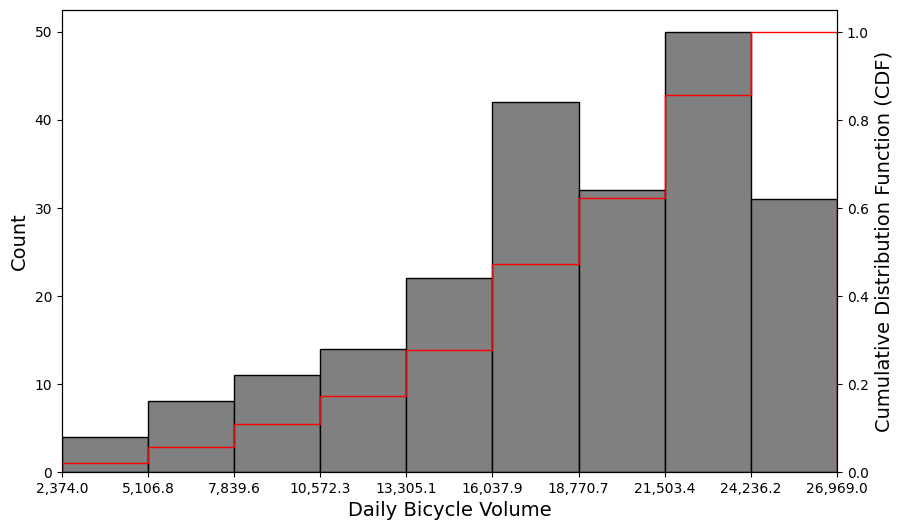

edges of the bins: [ 2374.      5106.7778  7839.5556 10572.3333 13305.1111 16037.8889
 18770.6667 21503.4444 24236.2222 26969.    ]
counts within each bin: [ 4.  8. 11. 14. 22. 42. 32. 50. 31.]


In [41]:
#generates a histogram for a numerical column using plt.hist()

fig, ax = plt.subplots(figsize=(10,6)) # define a figure of one plot of size 8x6 inch
ax2 = ax.twinx() # create the second axis to show the cumulative distribution. ax.twinx() means to generate a twin x-axis

N_bins = 9 # number of bins

# create the probability density distribution
counts, bins, patches = ax.hist(NY_bicycle.Total, 
                                facecolor='grey',
                                edgecolor='black',
                                density=False, #if density=False and probability density function if density=True
                                bins=N_bins) 

# create the probability cumulative distribution
n, bins, patches = ax2.hist(NY_bicycle.Total, 
                            cumulative=True, 
                            density=True, 
                            histtype='step', 
                            color='red', 
                            bins=N_bins) 

ax.set_xlim([NY_bicycle.Total.min(),NY_bicycle.Total.max()])
ax.set_xticks(ticks=bins,
              rotation=0,
              labels=[f'{x:,.1f}' for x in bins]
          ) #xticks are set to be the boundaries of bins and they are rotated by 45 degree
ax.set_xlabel('Daily Bicycle Volume',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax2.set_ylabel('Cumulative Distribution Function (CDF)',fontsize=14)

plt.show()

print('edges of the bins:', bins)
print('counts within each bin:', counts);


## Numerical Data Description

For numerical data, descriptive statistics tell the center, spread, and shape of the data, as well as relationship between different variables.

### Measurements of Locations

Mean, median, and modes are common statistics describing the locations of data distributions.

*Mean* of a numerical variable $X$ is its expected value, $\text{E}[X]$, denoted by $\mu$:
\begin{equation}
\mu = \text{E}[X].
\end{equation}

Given a sample of the variable, the sample mean is
\begin{equation}
\overline{x} = \frac{\sum_{n=1}^N x_n}{N}
\end{equation}
- The sample mean is denoted by $\overline{x}$
- $N$= sample size
- $x_n$ = the $n$th observation of the variable $X$
  
The sample mean, $\bar{x}$, is an unbiased estimation of the population mean, $\mu$.

*Median* is the value in the middle when the data are arranged in ascending order. It is
- the middle value for an odd number of observations
- the average of two middle values for an even number of observations

*Mode* is the value(s) that occurs most frequently.
- Bimodal data: Data contain exactly two modes
- Multimodal data: Data contain at least two modes

Suggested exercises:
1. What is the mean value of "Total"?
2. What is the median value of "Total"?
3. What is the mode of "Total"?

In [82]:
# mean() returns the mean value
NY_bicycle.Total.mean()

# median() returns the median value
NY_bicycle.Total.median()

# mode() returns the mode(s)
NY_bicycle.Total.mode()

# From the calcuation, can you tell the relationship of the total of daily bicycles's mean, median, and mode?

np.float64(18627.67757009346)

np.float64(19367.0)

0    23159
Name: Total, dtype: int64

### Measurements of Variability

Range, variance, standard deviation are commonly used statistics describing the variability/spread of data

*Range* of a numerical variable $X$ can be found by subtracting the smallest value from the largest value: 
\begin{equation}
\max(X)-\min(X).
\end{equation}

Range is based on only two of the observations and thus is highly influenced by extreme values.


*Variance*,  denoted by $\sigma^2$,  is the expected value of squared deviation from the mean value:
\begin{equation}
\sigma^2=\text{Var}[X]=\text{E}[(X-\mu)^2]  =\text{E}[X^2]-\mu^2,
\end{equation}
which is a measurement of variability that utilizes all the data. 

Given a sample of the variable, the *sample variance* is calculated as
\begin{equation}
s^2=\frac{\sum_{n=1}^N (x_n-\overline{x})^2}{N-1}.
\end{equation}

*Standard deviation*, denoted by $\sigma$, is the positive square root of the variance. Given a sample of the variable, the *sample standard deviation* is calculated as
\begin{equation}
s=\sqrt{\frac{\sum_{n=1}^N (x_n-\overline{x})^2}{N-1}}.
\end{equation}

*Coefficient of variation* (cv) is a descriptive statistic that indicates how large the standard deviation is relative to the mean:
\begin{equation}
\text{cv}=\frac{\sigma}{\mu}.
\end{equation}

Suggested Exercises:
1. Calculate the range of "Total"
2. Calculate the variance of "Total"
3. Calculate the standard deviation of "Total"

In [43]:
# find the range of a numerical column
NY_bicycle.Total.max() - NY_bicycle.Total.min() 

# var() returns the variance
NY_bicycle.Total.var()

# var() returns the sample standard deviation
NY_bicycle.Total.std()

# coefficient of variation
NY_bicycle.Total.std()/NY_bicycle.Total.mean()

np.int64(24595)

np.float64(30686697.177241012)

np.float64(5539.557489298311)

np.float64(0.297383153023435)

### Measurements of Shapes

Skewness is the third moment of the standarized variable:
\begin{equation}
\text{Skewness}(X) = \text{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right],
\end{equation}
measuring the asymmetry of the variable. 
- If the skewness value is less than zero, it indicates that the distribution is skewed to the left
- If the skewness value is greater than zero, it indicates that the distribution is skewed to the right
- If the skewness value is zero, it indicates the distribution is symmetric

Kurtosis is the fourth moment of the standarized variable.:
\begin{equation}
\text{Kurtosis}(X) = \text{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right],
\end{equation}
measuring the shape of the variable (i.e., how heavy the tails of the distribution).

3.0 is often subtracted from the calculated value to give 0.0 for a normal distribution.

- Positive kurtosis indicates heavier tails and a higher peak
- Negative kurtosis indicates lighter tails and a lower peak
- Zero kurtosis suggests a distribution similar to the normal distribution in terms of tail behavior and peak.


Suggested Exercises:
1. What is the skewness of "Total"? How do you interpret the result?
2. What is the kurtosis of the variable "Total"? How do you interpret the result?

In [83]:
# Skewness is a measure of the asymmetry of the distribution of a real-valued numerical variable
# skew() returns sample skewness

NY_bicycle.Total.skew().round(2)
# The skewness value is -0.78, indicating that the distribution is skewed to the left (i.e., with a long tail on the left side)

np.float64(-0.78)

In [84]:
# Kurtosis measures how heavy the tails of the distribution of a real-valued variable.
# kurtosis() returns he sample kurtosis
# Default value of the argument Fisher=True, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

NY_bicycle.Total.kurtosis().round(3)
# The kurtosis value is 0.005, suggestion that the tail and peak behaviors are close to a normal distribution

np.float64(0.005)

### Measurements of Distribution

Quantiles and Quartiles describe the data distribution

*Quantile* defines the fraction of values in a distribution which are below a certain limit. 

The $p$-quantile tells us the point in the data where:
- Approximately $p$ of the observations have values less than the $p$-quantile value.
- Approximately (1-$p$) of the observations have values greater than the $p$-quantile value.

Special quantiles include quartile, and percentiles (hundredth):
- 0.25-quantile is the 1st quartile, and the 25th percentile
- 0.50-quantile is the 2nd quartile, the 50th percentile, and the median
- 0.75-quantile is the 3rd quartile, and the 75th percentile

Given a sample of size $N$, if we sort the sample data in an ascending order, the location of $p$-quantile is approximately
\begin{equation}
L_{p}=p(N+1)
\end{equation}

Suggested exercises:
1. What are 1st, 2nd, and 3rd quantiles? [Hint: use .quantile]
2. What is the 0.99 quantile? [Hint: use .quantile]

In [46]:
# quantile() returns value(s) at the given quantile(s)

NY_bicycle.Total.quantile([0.25,0.5,0.75]) 

0.25    15704.75
0.50    19367.00
0.75    23151.50
Name: Total, dtype: float64

In [47]:
# 0.99 quantile
NY_bicycle.Total.quantile(0.99) 
# This indicates 99% of the recorded days had total bicycle counts less than 26,700

np.float64(26700.3)

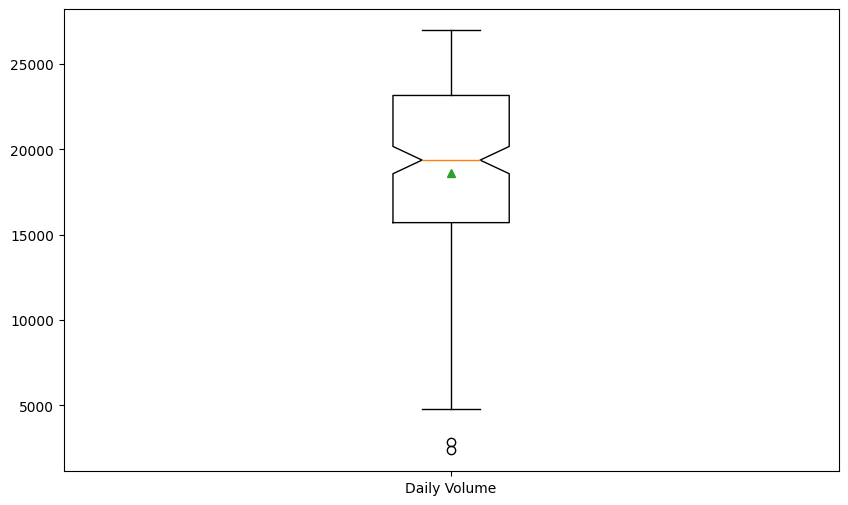

In [85]:
# Boxplot is often uesd to visulize data distribution. We can generate a boxplot using plt.boxplot() for a numerical variable

plt.subplots(figsize=(10,6))
plt.boxplot(NY_bicycle.Total,
            notch=True,
            tick_labels=['Daily Volume'],
            showfliers=True, 
            showcaps=True,
            showmeans=True)
plt.show();

#The boxplot indicates the distribution of daily total bicycle volume skews to the left (with a longer tail to the left). 
# There are two days with extremely low values (i.e., outliers)

- the 1st and 3rd quartiles, which are the boundaries of the box
- the median, which is the middle-point of the box
- interquartile range (IQR), which is the width between the 3rd and the 1st quantiles
- minimum value excluding outliers, corresponding to those smaller than Q1-1.5 IQR
- maximum value exlcuding outliers, corresponding  to those larger than Q3+1.5 IQR
- whiskers are the lines extending beyond the box .
- outliers are data points outside the minimum and maximum values defined above

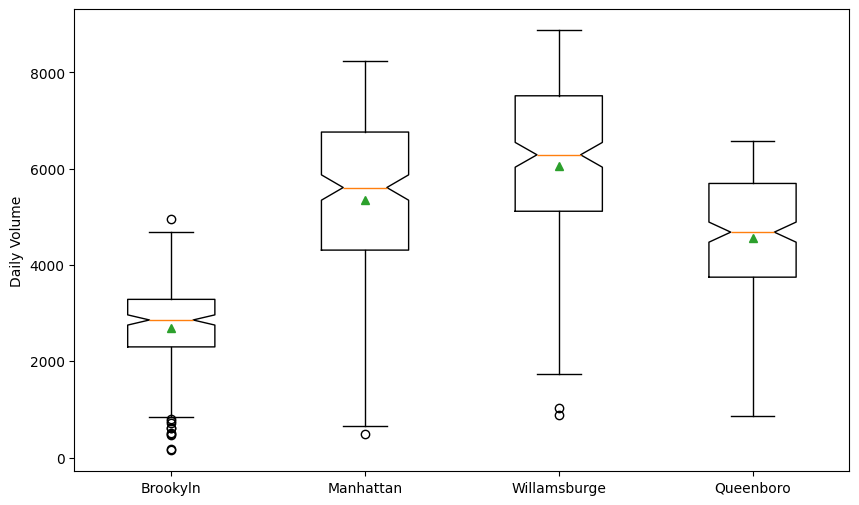

In [49]:
# generate a boxplot for each of mulitple numerical variables

data = NY_bicycle.loc[:,["Brooklyn_Bridge", "Manhattan_Bridge","Williamsburg_Bridge", "Queensboro_Bridge"]]
labels = ['Brookyln','Manhattan','Willamsburge','Queenboro']

plt.subplots(figsize=(10,6))
plt.boxplot(data,
            notch=True,
            tick_labels=labels,
            showfliers=True, 
            showcaps=True,
            showmeans=True)
plt.ylabel('Daily Volume')
plt.show();

# What differnces do you see about the distributions of the daily bicycle counts at respective bridges?


### Measurements of Correlation

*Correlation coefficient* and *covariance* between any two numerical variables can be calculated.

The correlation coefficient measures the relationship between two variables, $X$ and $Y$: 
\begin{equation}
r_{X,Y}=\frac{\text{E}[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}=\frac{\text{E}[XY]-\mu_X\mu_Y}{\sigma_X\sigma_Y}
\end{equation}
where:
- $\mu_X$ is the mean of $X$
- $\sigma_Y$ is the standard deviation of $X$
- $\mu_Y$ is the mean of $X$
- $\sigma_Y$ is the standard deviation of $Y$.

 Given a sample data of $X$ and $Y$, the sample's correlation coefficient is 
\begin{equation} 
\hat{r}_{X,Y}=\frac{\frac{1}{N}\sum_{n=1}^N x_ny_n-\overline{x}_X\overline{x}_Y}{s_Xs_Y} 
\end{equation}


Correlation coefficient is ranged within [-1, 1]. If two variables are independent, their correlation coefficient is zero. The reverse is not always true.  Can you find an example that two variables are not independent but their correlation coefficient is zero?

Suggested exercises:
1. What is the correlation coefficient between any two numerical Series? [Hint: use .corr(numerical_only=True)]
2. What is the correlation between "Brooklyn_Bridge" and "Manhattan_Bridge"?
3. What is the covariance between any two numerical Series? [Hint: use .corr(numerical_only=True)]
4. What is the covariance between "Brooklyn_Bridge" and "Manhattan_Bridge"?

In [86]:
# corr() returns the correlation coefficient between any two numerical columns

NY_bicycle.corr(numeric_only=True).round(2)

# Relationship among variables can be found:
# For example, from the correlation matrix, negative correlations between precipitation and d
# aily bicycle counts at respective bridges are observed, indicating less people ride bicycles
# when it is raining


,High_Temp_F,Low_Temp_F,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
High_Temp_F,1.00,0.89,-0.19,0.49,0.46,0.48,0.50,0.49
Low_Temp_F,0.89,1.00,-0.05,0.29,0.29,0.31,0.35,0.32
Precipitation,-0.19,-0.05,1.00,-0.59,-0.55,-0.56,-0.54,-0.57
Brooklyn_Bridge,0.49,0.29,-0.59,1.00,0.89,0.89,0.88,0.92
Manhattan_Bridge,0.46,0.29,-0.55,0.89,1.00,0.98,0.96,0.99
Williamsburg_Bridge,0.48,0.31,-0.56,0.89,0.98,1.00,0.96,0.99
Queensboro_Bridge,0.50,0.35,-0.54,0.88,0.96,0.96,1.00,0.98
Total,0.49,0.32,-0.57,0.92,0.99,0.99,0.98,1.00


In [51]:
# corr() returns the correlation coefficient between two columns

NY_bicycle.Brooklyn_Bridge.corr(NY_bicycle.Manhattan_Bridge).round(2) 

np.float64(0.89)

In [52]:
# cov() returns the covariance between any two numerical columns

NY_bicycle.cov(numeric_only=True).round(2)

# covariance matrix is not normalized, and more difficult to interpret than correlation matrix

,High_Temp_F,Low_Temp_F,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
High_Temp_F,107.96,85.95,-0.79,4387.50,8405.58,8745.01,6811.74,28349.83
Low_Temp_F,85.95,86.60,-0.19,2340.21,4673.00,5136.58,4272.02,16421.81
Precipitation,-0.79,-0.19,0.17,-208.98,-397.27,-406.49,-289.49,-1302.23
Brooklyn_Bridge,4387.50,2340.21,-208.98,730530.66,1333902.83,1330993.57,978789.45,4374216.51
Manhattan_Bridge,8405.58,4673.00,-397.27,1333902.83,3050424.76,3012097.02,2190936.63,9587361.23
Williamsburg_Bridge,8745.01,5136.58,-406.49,1330993.57,3012097.02,3082886.28,2210714.77,9636691.64
Queensboro_Bridge,6811.74,4272.02,-289.49,978789.45,2190936.63,2210714.77,1707986.95,7088427.79
Total,28349.83,16421.81,-1302.23,4374216.51,9587361.23,9636691.64,7088427.79,30686697.18


In [53]:
# returns the covariance between two specific numerical columns

NY_bicycle.Brooklyn_Bridge.cov(NY_bicycle.Manhattan_Bridge).round(2) 

np.float64(1333902.83)

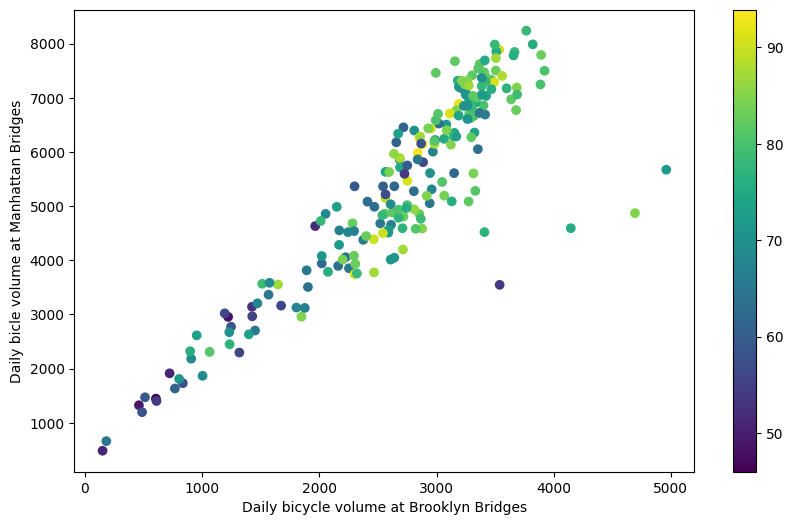

In [54]:
# generate scatter plot using plt.scatter() to visualize the correlation between two numerical variables

plt.subplots(figsize=(10,6))

plt.scatter(x=NY_bicycle.Brooklyn_Bridge,
            y=NY_bicycle.Manhattan_Bridge,
            c=NY_bicycle.High_Temp_F,
            cmap='viridis'
           ) # plt.scatter() returns a scatter plot of two numerical columns to show there association. The color is the 'High_Temp_F' value of each data point

plt.xlabel('Daily bicycle volume at Brooklyn Bridges') #plt.xlabel() defines the x label of the plot
plt.ylabel('Daily bicle volume at Manhattan Bridges') #plt.ylabel() defines the y label of the plot

plt.colorbar() # displays the colorbar

plt.show();

# This figure shows that daily bicycle volumes at these bridges are positively correlated. 
# In generally, days with higher temperate are likely to have more people who ride bicycles.

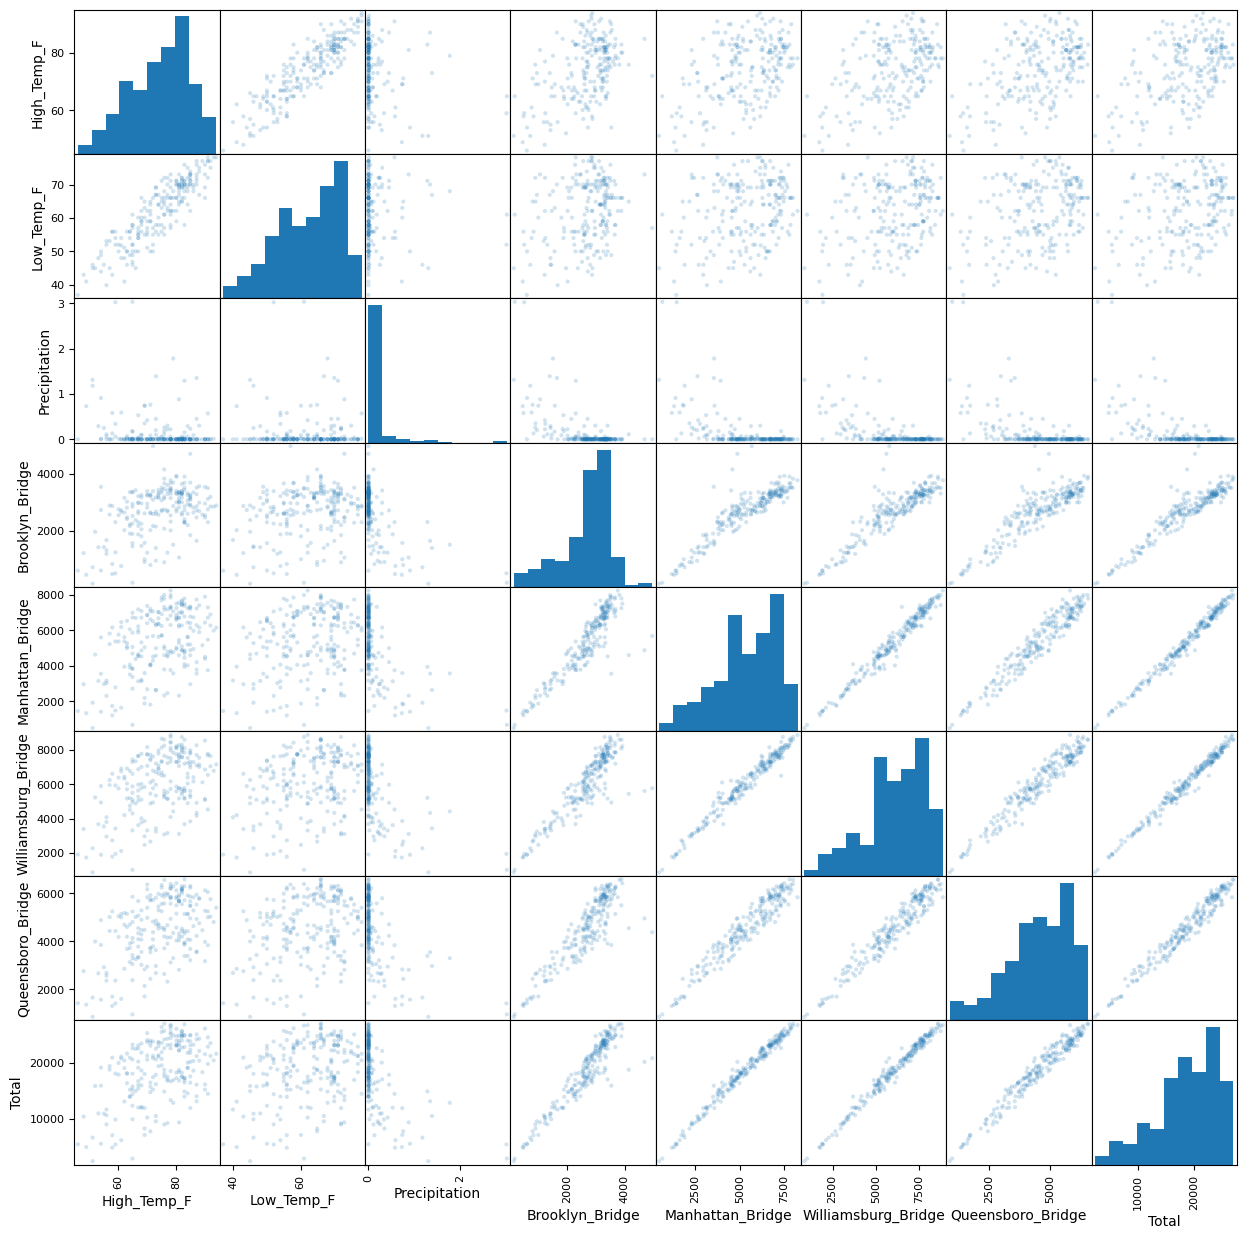

In [55]:
# generate satter plot matrix using pd.plotting.scatter_matrix()

pd.plotting.scatter_matrix(NY_bicycle,
                           alpha=0.2,
                           figsize=(15,15)
                          ) #pd.plotting.scatter_matrix() generates the matrix of scatter plots
plt.show();

## Grouping & Aggregrating Data

### Time Series

If the dataset contains records collected overtime, it is helpful to formulate the data as time series data. In the dataset NY_bicycle. One column is a string Series named "Date", and another column is also a string Series named "Day". We can convert "Date" to DateTime Series, and convert "Day" to ordered categorical variable. Thereby, we can take advantages of methods and tools developed for time series data.

Suggested Exercise:
1. Convert the DataFrame NY_bicycle into a a time series dataset by creating a new DataFrame (name it as NY_bicycle_ts) whose index is a DateTimeIndex object with values equal to 'Date' in the DataFrame NY_bicycle.[Hint: pandas.to_datetime, and .set_index can be considered]
2. Convert the string Series "Day" of NY_bicycle_ts into ordered categorical variable [Hint: set up arguments in pandas.Categorical()] 
3. Can you count daily average number of bicycles by "Day"? Please format the counts as comma separated integers with 1 digital after decimal point (e.g., 2,421.1). What does your result look like if you skipped step 2?
4. Can you count bicycles by months? Please format the counts as comma separated integers. [Hint: downsampling to monthly data using the resample method]

In [88]:
# save the DataFrame as a new one whose column "Date" is converted into the DateTimeIndex

#Date_datetime = pd.to_datetime(NY_bicycle.Date+'-2017', format='%d-%b-%Y') # pandas.to_datetime() converts the string Series "Date" to DateTime
NY_bicycle_ts=NY_bicycle.set_index(Date_datetime) # set "Date" formatted as DateTime as the index
del NY_bicycle_ts['Date'] # drop the original column "Date"
NY_bicycle_ts.head()

,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
Date,,,,,,,,,,
2017-04-01,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
2017-04-02,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2017-04-03,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
2017-04-04,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
2017-04-05,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


In [57]:
# convert the Series "Day" to ordered categorical variable. 
# After that, The ranking of dataset according to "Day" is no longer in an alphabetical order, 
# but in one defined for this categorical variable

ordered_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
NY_bicycle_ts['Day'] = pd.Categorical(NY_bicycle_ts['Day'], categories=ordered_categories, ordered=True)

In [93]:
# aggregrate total count by days of week

NY_bicycle_ts.groupby('Day', 
                      observed=False
                     ).Total.mean().map('{:,.0f}'.format).to_frame("Daily Average")

# groupby "Day"
# aggregrate data with mean()
# format dadta as comma separated values with one digit after the decimal point using .map() method
# use to_frame() to present result as a DataFrame

# The result shows that Wednesdays have the highest daily average count, followed by Thursday. 
# Weekends (Saturdays and Sundays) usually have lower counts 

,Daily Average
Day,
Friday,"18,573"
Monday,"18,539"
Saturday,"15,048"
Sunday,"14,993"
Thursday,"21,285"
Tuesday,"20,254"
Wednesday,"21,892"


In [94]:
# aggregate total counts by months
# rasample() is a very useful function for changing the frequency of data. Data in NY_bicycle were recorded daily.
# resample("ME") downsample or aggregrate day to become monthly data
NY_bicycle_ts.Total.resample("ME",closed="right", label="right").mean().map('{:,.0f}'.format).to_frame("Monthly Total")

# From September and August have higher daily average than other months

,Monthly Total
Date,
2017-04-30,"15,029"
2017-05-31,"17,196"
2017-06-30,"19,894"
2017-07-31,"18,805"
2017-08-31,"20,367"
2017-09-30,"20,435"
2017-10-31,"18,652"


### Aggregrate Data with groupby

The instance method groupby allows dividing the dataset by one or more attributes. After that, we can aggregrate the data within each segment using descriptive statistics.

Suggested Exercises:
1. aggregate daily counts of bicycles to become total counts by 'Weather", and name the aggregrated value as "Total Count". Please format the counts as comma-separated integers. [hint: .map({:,}.format and to_frame('name')))
2. repeat step 1 but sort values in the ascending order 
3. group data by "Weather", and output the key and size of each subgroup [Hint: key and data of each subgroup are part of the output object]
4. aggregrate daily counts of bicycles to become total counts by "Weather" and "Day". Please format the counts as comma-separated integers. 
5. Unstack the result in step 4 by changing "Weather" from index to column [Hint: use unstack(level=). In order to use unstack, convert "Weather" and "Day" to index]
6. group data by "Weather" and "Day". Then, calculate the following descriptive statistics of "Total" for each subgroup: mean, standard deviation, minimum, maximum, median. Keep 1 digit after the decimal point.[Hint: .agg(dict{})
7. reset the index for the output from step 6. What changes do you observe?
8. [Optional] group data by "Day", then aggregrate Weather data in each subgroup as a string. For example, if a subgroup has five data points with "Weather" being 'N', 'N', 'R','N', 'T', the string is 'N,N,R,N,T'. [Hint: consider the join method]
9. [Optional] group data by "Weather", then aggregrate Day data in each subgroup as a list.
10. group data by "Day" and then determine the unique types of weather occured on each day of week. [Hint: use .nunique() method)
11. group data by "Weather" and aggregrate data as the sum of "Total". Plot a bar chart to show the aggregrated result. What's your observation? [Hint: .plot()]
13. 
12. group data by "Day" and then aggregrate data by the sum of "Total". plot a line chart to show the aggregrated result. What's your observation?
14. group data by "Weather". For each subgroup, aggregrate "Total" as mean and "Precipitation" as stdandard deviation [hint: .agg({dict})]
15. group data by "Weather", and then get the subgroup with "Weather"=='T' [hint: .get_group()]
16. group data by "Weather" and then generate a random sample of size 3 from each of the subgroup. [Hint: .apply(lambda x: x.sample(3))]

In [97]:
# Let's find daily total bicycle counts by weather types

# groupby "Weather"
# aggregrate data with mean()
# format dadta as comma separated values using .map
# use to_frame () to present result as a DataFrame and define column name

out4 = NY_bicycle_ts.groupby('Weather').Total.mean().map('{:,.0f}'.format).to_frame('Total Count') 
out4

,Total Count
Weather,
N,"20,926"
R,"14,170"
T,"19,088"


In [99]:
# After aggregating data, we often sort the aggregrated data to faciliate data understanding
# find total bicycle counts by weather types, sorted in an ascending order

out5 = NY_bicycle_ts.groupby('Weather').Total.mean().sort_values().map('{:,.0f}'.format).to_frame('Total Count') 
out5

# Raining days have less people riding bicycles

,Total Count
Weather,
R,"14,170"
T,"19,088"
N,"20,926"


In [62]:
# after grouped the data, key is an identify of each group, and y is the data of each group

for key,y in NY_bicycle_ts.groupby('Weather'):
    print(f"the group for Weather {key} has {len(y)} data points")

the group for Weather N has 131 data points
the group for Weather R has 69 data points
the group for Weather T has 14 data points


In [100]:
# we can group data according to multiple attributes
# In this example, we group data first by "Weather" and then by "Day". The aggregrated data is the sum of "Total" for each group.
out6 = NY_bicycle_ts.groupby(['Weather','Day'], 
                             observed=False
                            ).Total.mean().map('{:,.0f}'.format).to_frame("Total Count")
out6

# If observation = True, groups without observations will be skipped in the summary

Total Count
Weather Day                  
N       Friday         21,373
        Monday         22,360
        Saturday       16,142
        Sunday         16,599
        Thursday       23,145
        Tuesday        23,116
        Wednesday      23,835
R       Friday         13,290
        Monday         12,118
        Saturday       13,720
        Sunday         10,013
        Thursday       15,359
        Tuesday        15,117
        Wednesday      18,889
T       Friday         17,622
        Monday         19,470
        Sunday         15,369
        Thursday       22,495
        Tuesday        22,754
        Wednesday      19,413

In [101]:
# Unstack the DataFrame

# reset_index().set_index(['Weather', 'Day']) will set these two columns as multi-indices.
# Then, we can use the unstack function. Default level to unstack is the lowest level, 
# which is "Day" in this example. We would like to unstack by "Weather", therefore, set level =0

out6.reset_index()

out6.reset_index().set_index(['Weather', 'Day'])

out6.reset_index().set_index(['Weather', 'Day']).unstack(level=0)

,Weather,Day,Total Count
0,N,Friday,"21,373"
1,N,Monday,"22,360"
2,N,Saturday,"16,142"
3,N,Sunday,"16,599"
4,N,Thursday,"23,145"
5,N,Tuesday,"23,116"
6,N,Wednesday,"23,835"
7,R,Friday,"13,290"
8,R,Monday,"12,118"
9,R,Saturday,"13,720"


Total Count
Weather Day                  
N       Friday         21,373
        Monday         22,360
        Saturday       16,142
        Sunday         16,599
        Thursday       23,145
        Tuesday        23,116
        Wednesday      23,835
R       Friday         13,290
        Monday         12,118
        Saturday       13,720
        Sunday         10,013
        Thursday       15,359
        Tuesday        15,117
        Wednesday      18,889
T       Friday         17,622
        Monday         19,470
        Sunday         15,369
        Thursday       22,495
        Tuesday        22,754
        Wednesday      19,413

Total Count                
Weather             N       R       T
Day                                  
Friday         21,373  13,290  17,622
Monday         22,360  12,118  19,470
Saturday       16,142  13,720     NaN
Sunday         16,599  10,013  15,369
Thursday       23,145  15,359  22,495
Tuesday        23,116  15,117  22,754
Wednesday      23,835  18,889  19,413

In [102]:
# group data by "Weather" and "Day". For each subgroup, calculate descriptive statistics of "Total": mean, std, max, min, median

out7 = NY_bicycle_ts.groupby(['Weather','Day'],
                             observed=False
                            ).agg({'Total':['mean','std','max','min','median']}).map('{:,.1f}'.format)

out7

Total                                       
                       mean      std       max       min    median
Weather Day                                                       
N       Friday     21,373.1  1,924.2  23,944.0  17,168.0  21,969.0
        Monday     22,359.6  2,321.5  25,680.0  16,860.0  23,045.0
        Saturday   16,141.6  3,498.5  20,134.0   5,397.0  17,259.0
        Sunday     16,598.7  1,819.5  20,787.0  13,033.0  16,765.0
        Thursday   23,145.4  2,409.3  26,360.0  18,290.0  23,923.0
        Tuesday    23,115.6  3,094.6  26,622.0  13,925.0  23,986.5
        Wednesday  23,835.2  2,343.3  26,969.0  17,991.0  23,223.5
R       Friday     13,289.7  5,552.4  23,539.0   5,356.0  12,805.0
        Monday     12,118.2  4,460.6  19,939.0   6,126.0  11,862.0
        Saturday   13,719.6  4,415.9  19,043.0   2,374.0  14,781.0
        Sunday     10,012.6  4,281.9  15,878.0   2,835.0   9,865.0
        Thursday   15,358.6  8,130.3  23,948.0   4,789.0  18,140.0
        Tuesday    15,116.6  6,678.1  24,946.0   5,493.0  16,638.0
        Wednesday  18,888.9  5,045.2  24,763.0   9,819.0  20,093.5
T       Friday     17,621.7  6,371.7  22,180.0  10,341.0  20,344.0
        Monday     19,470.5  2,284.7  21,086.0  17,855.0  19,470.5
        Sunday     15,369.3    961.6  16,408.0  14,510.0  15,190.0
        Thursday   22,495.0    896.6  23,129.0  21,861.0  22,495.0
        Tuesday    22,754.0  1,664.5  23,931.0  21,577.0  22,754.0
        Wednesday  19,413.0  5,071.4  22,999.0  15,827.0  19,413.0

In [66]:
# reset index

out7.reset_index()

Weather        Day     Total                                       
                           mean      std       max       min    median
0        N     Monday  22,359.6  2,321.5  25,680.0  16,860.0  23,045.0
1        N    Tuesday  23,115.6  3,094.6  26,622.0  13,925.0  23,986.5
2        N  Wednesday  23,835.2  2,343.3  26,969.0  17,991.0  23,223.5
3        N   Thursday  23,145.4  2,409.3  26,360.0  18,290.0  23,923.0
4        N     Friday  21,373.1  1,924.2  23,944.0  17,168.0  21,969.0
5        N   Saturday  16,141.6  3,498.5  20,134.0   5,397.0  17,259.0
6        N     Sunday  16,598.7  1,819.5  20,787.0  13,033.0  16,765.0
7        R     Monday  12,118.2  4,460.6  19,939.0   6,126.0  11,862.0
8        R    Tuesday  15,116.6  6,678.1  24,946.0   5,493.0  16,638.0
9        R  Wednesday  18,888.9  5,045.2  24,763.0   9,819.0  20,093.5
10       R   Thursday  15,358.6  8,130.3  23,948.0   4,789.0  18,140.0
11       R     Friday  13,289.7  5,552.4  23,539.0   5,356.0  12,805.0
12       R   Saturday  13,719.6  4,415.9  19,043.0   2,374.0  14,781.0
13       R     Sunday  10,012.6  4,281.9  15,878.0   2,835.0   9,865.0
14       T     Monday  19,470.5  2,284.7  21,086.0  17,855.0  19,470.5
15       T    Tuesday  22,754.0  1,664.5  23,931.0  21,577.0  22,754.0
16       T  Wednesday  19,413.0  5,071.4  22,999.0  15,827.0  19,413.0
17       T   Thursday  22,495.0    896.6  23,129.0  21,861.0  22,495.0
18       T     Friday  17,621.7  6,371.7  22,180.0  10,341.0  20,344.0
19       T   Saturday       nan      nan       nan       nan       nan
20       T     Sunday  15,369.3    961.6  16,408.0  14,510.0  15,190.0

In [67]:
# group data by "Day" and then convert values of "Weather" of each subgroup into a string

NY_bicycle_ts.groupby('Day', observed=False).Weather.apply(lambda Weather: ','.join(Weather)).to_frame('Instances')

,Instances
Day,
Monday,"R,N,T,T,N,N,N,R,R,R,N,R,N,R,N,N,R,N,R,N,N,N,N,N,N,N,N,R,R,N,R"
Tuesday,"R,N,N,R,N,N,N,N,R,R,T,R,R,N,N,N,N,N,N,R,R,R,T,N,R,N,N,N,N,R,N"
Wednesday,"N,R,T,R,N,N,N,R,R,N,R,N,N,N,N,N,N,R,N,N,T,R,R,R,N,N,N,R,N,N"
Thursday,"R,N,R,N,N,N,N,R,N,N,N,N,N,T,N,R,T,N,N,N,N,N,R,R,N,N,N,R,N,N"
Friday,"T,N,R,N,R,N,N,R,R,N,N,R,T,R,R,N,N,R,T,R,N,N,N,N,N,N,N,N,N,N"
Saturday,"N,N,N,R,R,R,R,R,N,R,N,R,R,R,N,N,R,N,R,R,N,N,R,N,N,N,N,N,R,N,N"
Sunday,"N,N,T,N,N,R,R,N,N,R,N,T,N,N,N,N,R,N,N,N,N,N,R,N,N,N,N,R,T,N,R"


In [68]:
# group data by "Weather" and then convert values of "Day" of each subgroup into a list 

# tolist() converts series into a list
NY_bicycle_ts.groupby('Weather').Day.apply(lambda Days: Days.tolist())

Weather
N    [Saturday, Sunday, Wednesday, Saturday, Sunday, Monday, Tuesday, Thursday, F...
R    [Monday, Tuesday, Thursday, Wednesday, Thursday, Friday, Saturday, Tuesday, ...
T    [Friday, Sunday, Monday, Wednesday, Monday, Tuesday, Sunday, Friday, Thursda...
Name: Day, dtype: object

In [69]:
# Group data by "Day" and then determine the unique weathers occured on each day of week

NY_bicycle_ts.groupby('Day', observed=False).Weather.nunique().to_frame('Count Weather Types') # use unique() to find the number of unique values by groups

,Count Weather Types
Day,
Monday,3
Tuesday,3
Wednesday,3
Thursday,3
Friday,3
Saturday,2
Sunday,3


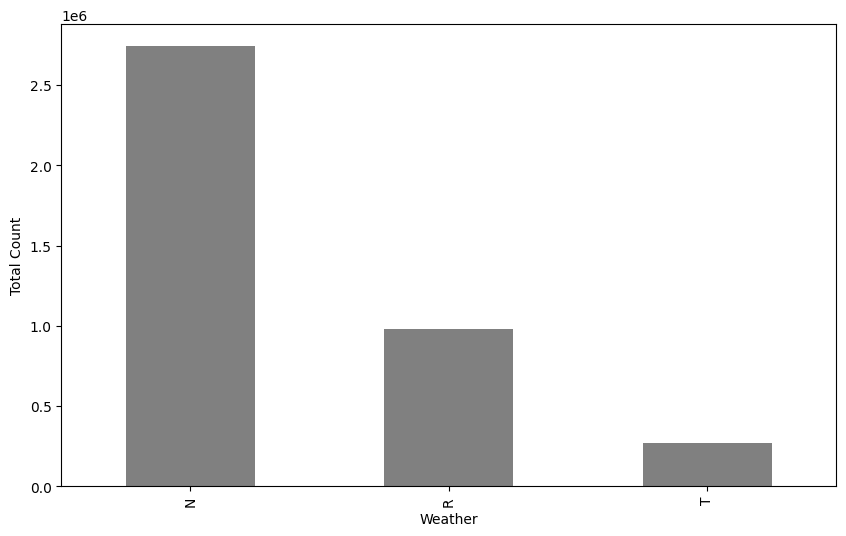

In [104]:
# a bar chart displaying the distribution of total count by "Weather"

plt.clf() # clear the current figure
NY_bicycle_ts.groupby('Weather').Total.sum().plot(kind='bar', color='grey') #size() returns the size of each group
plt.ylabel('Total Count');

# the figure shows that near 3 million bicycles were counted in no-rain days, and naer 1 million in raining days.

                 mean          std
Weather                           
N        20926.213740  3876.824444
R        14170.304348  5816.202110
T        19088.428571  4077.086152


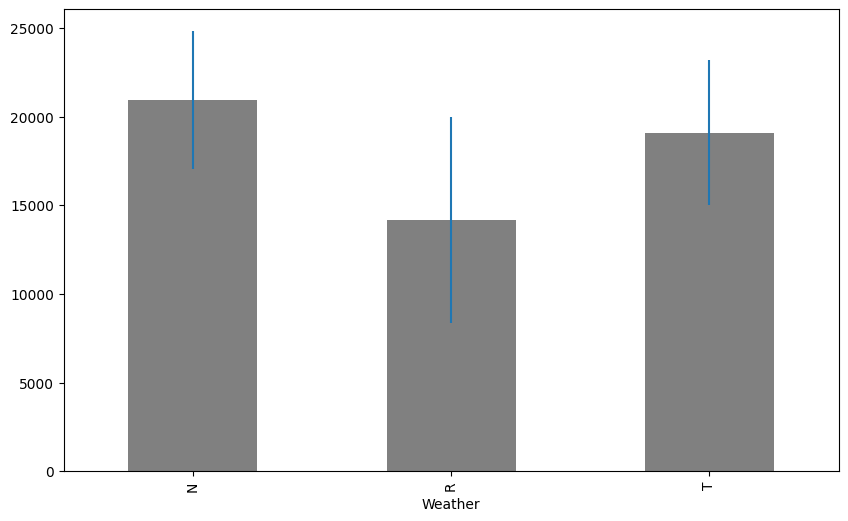

In [71]:
# a bar chart displaying the sample mean and sample standard deviation of 'Total' by weather groups

# create a bar chart of mean values of 'Total' by weather categories
plt.clf
ax = plt.gca() # Get the current ~matplotlib.axes.Axes instance on the current figure matching the given keyword args, or create one.
NY_bicycle_ts.groupby('Weather').Total.mean().plot(kind='bar', color='grey', ax=ax)

# calculate the mean and the standard deviation of each group
out8 = NY_bicycle_ts.groupby('Weather').Total.agg(['mean','std']) # agg() ggregates using one or more operations over the specified axis
print(out8)

# add verticle lines to represent the variation of 'Total' of each group
for i, (index, row) in enumerate(out8.iterrows()): # iterrows() iterates over DataFrame rows as (row index, data series) pairs.
  Avg = row ['mean']
  Std = row ['std']
  ax.vlines(x=i, ymin=Avg-Std, ymax=Avg+Std) # ax.vlines(x, ymin, ymax) plots a verticle line at the location specified by x. The range of the line is from ymin to ymax
plt.show();

# raining days are clearly have lower average daily count

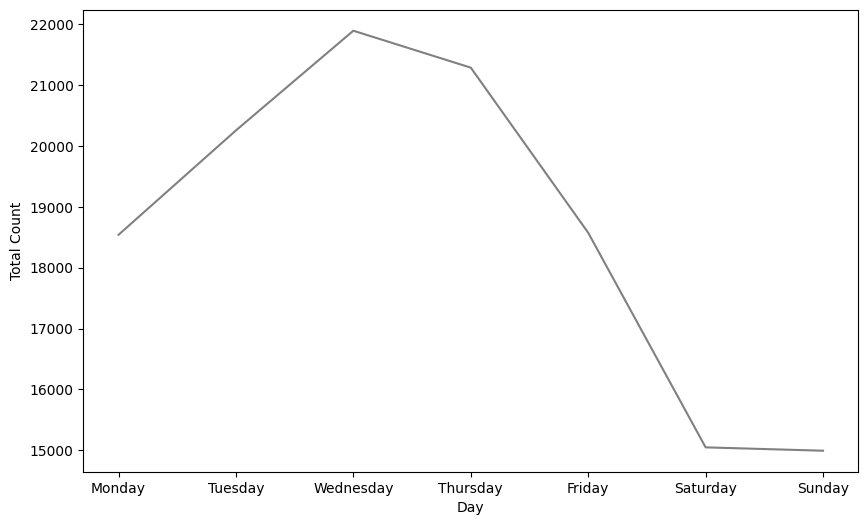

In [72]:
# a line chart displaying trend of total count by "Day"

plt.clf()
NY_bicycle_ts.groupby('Day', observed=False).Total.mean().plot(kind='line',color='grey')
plt.ylabel('Total Count');

In [108]:
# group data by "Weather". For each subgroup, aggregrate "Total" as mean and "Precipitation" as stdandard deviation

NY_bicycle_ts.groupby('Weather').agg({'Total':'std','Precipitation':'mean'}).map('{:,.1f}'.format) # group data by weather categories and aggregrate data in each group in terms of the mean value of 'Total' and the standard deviation of precipitation

,Total,Precipitation
Weather,,
N,"3,876.8",0.0
R,"5,816.2",0.4
T,"4,077.1",nan


In [74]:
# group data by "Weather", and then get the slice with "Weather"=='T'

out9 = NY_bicycle_ts.groupby('Weather')
out9.get_group('T') # get_group() constructs DataFrame from group with provided name. 
# In this example, a dataframe is consructed using group "T". Only 14 days were "T"

,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
Date,,,,,,,,,,
2017-04-07,Friday,48.0,43.0,NaN,T,1222,2955,3399,2765,10341
2017-04-16,Sunday,84.9,62.1,NaN,T,2877,4585,5259,3687,16408
2017-04-17,Monday,73.9,64.0,NaN,T,3152,6352,6924,4658,21086
2017-04-19,Wednesday,52.0,45.0,NaN,T,1965,4632,5234,3996,15827
2017-04-24,Monday,60.1,50.0,NaN,T,2544,5366,5762,4183,17855
2017-06-13,Tuesday,93.9,78.1,NaN,T,2882,6141,7155,5399,21577
2017-06-18,Sunday,84.0,72.0,NaN,T,2199,4014,4901,3396,14510
2017-06-30,Friday,88.0,73.9,NaN,T,2687,5890,7013,4754,20344
2017-07-06,Thursday,75.0,71.1,NaN,T,3065,6243,7302,5251,21861


In [75]:
# group data by "Weather" and then generate a random sample of size 3 from each of the subgroup
df_sample=NY_bicycle_ts.groupby('Weather').apply(lambda x: x.sample(3),include_groups=False).reset_index(drop=True) # sample() returns a random sample. reset_index(drop=True) means do not add the index as a column of the dataframe
df_sample

,Day,High_Temp_F,Low_Temp_F,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,Saturday,75.9,68.0,0.00,2074,3787,5242,3711,14814
1,Monday,66.9,55.9,0.00,2685,5865,5981,4550,19081
2,Saturday,84.9,73.0,0.00,4693,4871,5612,4958,20134
3,Thursday,71.1,59.0,0.01,3249,7059,7717,5923,23948
4,Saturday,73.0,66.9,1.39,1399,2633,3439,2977,10448
5,Tuesday,82.0,72.0,0.03,3407,7473,7975,6091,24946
6,Tuesday,93.9,78.1,NaN,2882,6141,7155,5399,21577
7,Thursday,75.0,71.1,NaN,3065,6243,7302,5251,21861
8,Sunday,72.0,66.0,NaN,2169,4285,4943,3793,15190


### Cross-Tabulation

Crosstabulation is a useful type of table for describing data of two variables.

#### Use crosstab

Suggested Exercises:
1. Create a crosstabulation to summarize mean total by "Weather" and "Day". Please show the margins. [Hint: "Weather" is the index, "Day" is the column, "Total" is the value, and mean is the method to aggregate value. ]

In [109]:
# create a cross-tabulation to summary data on two-axes using pd.crosstab(index,colum,values,aggfunc). index and column are the two axes, values are array-like, aggregrated using the specific aggfunc
# In this example, index is "Weather", column is "Day", values are "Total", and teh aggfunc is mean. 

pd.crosstab(NY_bicycle_ts.Weather, # define row variable
            NY_bicycle_ts.Day, # define column variable
            margins=True, # margins=True will provide the margins of the crosstabulation
            values=NY_bicycle_ts.Total, # define values to be aggregrated in this table
            aggfunc='mean' # method for data aggregration is mean
           ).map('{:,.0f}'.format) #define data format: comma separated and one digit after the decimal point

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
Weather,,,,,,,,
N,"21,373","22,360","16,142","16,599","23,145","23,116","23,835","20,926"
R,"13,290","12,118","13,720","10,013","15,359","15,117","18,889","14,170"
T,"17,622","19,470",nan,"15,369","22,495","22,754","19,413","19,088"
All,"18,573","18,539","15,048","14,993","21,285","20,254","21,892","18,628"


#### Use pivot_table

pivot_table is another pandas function for generating cross tabulation.

Suggested Exercises:
1. create a pivot table to summary data on two-axes using pd.pivot_table(DataFrame, values, index,colums,values,aggfunc,margins).  "Weather" is the index, "Day" is the column, "Total" is the value, and mean is the method to aggregate value. Margins of the table are needed.
2. create a pivot table to summarize the mean values of "Brooklyn_Bridge" and "Total" by "Weather" and "Day". That is: Index is "Weather", Columns is "Day", Values are "Brooklyn_Bridge" and "Total", and aggfunc is numpy.mean. [Hint: pass a dictionary to aggfunc. The discdtionary specifies what function is used for aggregrating what values]
3. create a pivot table to summarize the mean and standard deviation of "Total" by  "Weather" and "Day". That is: Index is "Weather", Columns is "Day", Values are "Total", and aggfunc are numpy.mean and numpy.std. [Hint: pass a list of functions to aggfunc]
4. create a table summarizing the mean values of "High_Temp_F" and "Low_Temp_F" when Weather is 'T'. [Hint: ceate a pivot table with two indices: "Weather" and "Day". Values are "High_Temp_F" and "Low_Temp_F". Aggfunc is mean. Then, get the slice with "Weather"=='T' using DataFrame.query()]
5. reate a table summarizing the mean values of "High_Temp_F" and "Low_Temp_F" on Friday and when Weather is 'N' and 'R', respectively.[Hint: create a pivot table with two indices: "Weather" and "Day". Values are "High_Temp_F" and "Low_Temp_F". Aggfunc is mean. Then, get the slice with "Weather"=='N' or 'R' and "Day"=='Friday']

In [77]:
# summarize mean of "Total" by "Weather" and "Day"

pd.pivot_table(NY_bicycle_ts, # the dataset to be summarized 
               index=['Weather'], # define row variable
               columns=['Day'], # define column variable
               values=['Total'], # define the variable to be presented in the table
               aggfunc='mean', # method for aggregrating data
               margins=True, # show margins
               observed=True  # do not display row(s) and column(s) with all missing values
              ).map('{:,.1f}'.format) #define data format: comma separated and one digit after the decimal point

Total                                                              \
Day        Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday   
Weather                                                                         
N        22,359.6  23,115.6  23,835.2  23,145.4  21,373.1  16,141.6  16,598.7   
R        12,118.2  15,116.6  18,888.9  15,358.6  13,289.7  13,719.6  10,012.6   
T        19,470.5  22,754.0  19,413.0  22,495.0  17,621.7       nan  15,369.3   
All      18,539.1  20,253.9  21,891.6  21,285.1  18,572.9  15,047.8  14,992.5   

                   
Day           All  
Weather            
N        20,926.2  
R        14,170.3  
T        19,088.4  
All      18,627.7

In [111]:
# create crosstabulation using pd.pivot_table create a pivot table 
# to summarize the mean values of "Brooklyn_Bridge" and "Total" by "Weather" and "Day"

pd.pivot_table(NY_bicycle_ts,
               index=['Day'],
               columns=['Weather'],
               values=['Brooklyn_Bridge','Total'], 
               aggfunc={'Brooklyn_Bridge':'mean','Total':'mean'},
               margins=False,
               observed=False
              ).map('{:,.0f}'.format)

Brooklyn_Bridge                 Total                
Weather                 N      R      T       N       R       T
Day                                                            
Friday              3,035  1,774  2,352  21,373  13,290  17,622
Monday              3,184  1,642  2,848  22,360  12,118  19,470
Saturday            2,510  2,195    nan  16,142  13,720     nan
Sunday              2,779  1,648  2,415  16,599  10,013  15,369
Thursday            3,236  2,004  3,176  23,145  15,359  22,495
Tuesday             3,270  1,908  3,063  23,116  15,117  22,754
Wednesday           3,326  2,512  2,480  23,835  18,889  19,413

In [112]:
# create crosstabulation using pd.pivot_table(data,index,columns,values, aggfunc)

pd.pivot_table(NY_bicycle_ts,
               index=['Day'],
               columns=['Weather'],
               values=['Total'], 
               aggfunc=['mean','std'],
               margins=False,
               observed=False
              ).map('{:,.0f}'.format)

mean                    std              
            Total                  Total              
Weather         N       R       T      N      R      T
Day                                                   
Friday     21,373  13,290  17,622  1,924  5,552  6,372
Monday     22,360  12,118  19,470  2,321  4,461  2,285
Saturday   16,142  13,720     nan  3,498  4,416    nan
Sunday     16,599  10,013  15,369  1,819  4,282    962
Thursday   23,145  15,359  22,495  2,409  8,130    897
Tuesday    23,116  15,117  22,754  3,095  6,678  1,665
Wednesday  23,835  18,889  19,413  2,343  5,045  5,071

In [80]:
# create a table summarizing the mean values of "High_Temp_F" and "Low_Temp_F" when Weather is 'T'
#using query() function to extract part of the summary table

out10 = pd.pivot_table(NY_bicycle_ts,
                       index=['Weather','Day'],
                       values=['High_Temp_F','Low_Temp_F'],
                       aggfunc=['mean'], 
                       margins=True,
                       observed=False
                      ).map('{:,.1f}'.format)


out10.query("Weather==['T']") 

mean           
                  High_Temp_F Low_Temp_F
Weather Day                             
T       Monday           67.0       57.0
        Tuesday          89.0       74.0
        Wednesday        66.0       58.0
        Thursday         76.0       69.0
        Friday           72.3       62.3
        Sunday           80.3       66.7

In [81]:
# create a table summarizing the mean values of "High_Temp_F" and "Low_Temp_F" for Friday 
# and when Weather is 'N' and 'R' respectively

out11 = pd.pivot_table(NY_bicycle,
                      index=['Weather','Day'],
                      values=['High_Temp_F','Low_Temp_F'],
                      aggfunc=['mean'], 
                      margins=True,
                      observed=False
                      ).map('{:,.1f}'.format)

out11.query("Weather==['N','R'] & Day =='Friday'")

mean           
               High_Temp_F Low_Temp_F
Weather Day                          
N       Friday        75.2       61.2
R       Friday        72.7       63.1